# 7章 畳み込みニューラルネットワーク（CNN）とは

* CNNとは: テキスト参照
* 新しい用語
    * Convolutionレイヤ: 畳み込み層
        * 畳み込み演算
        * パディング
        * ストライド
    * Poolingレイヤ: プーリング層
* これまでのニューラルネットは全結合
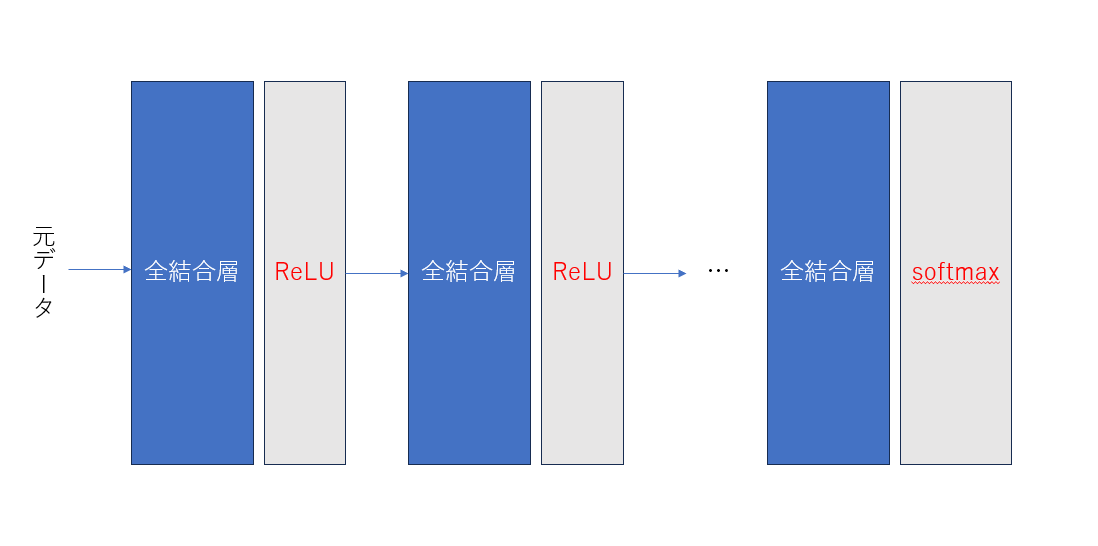

* CNN
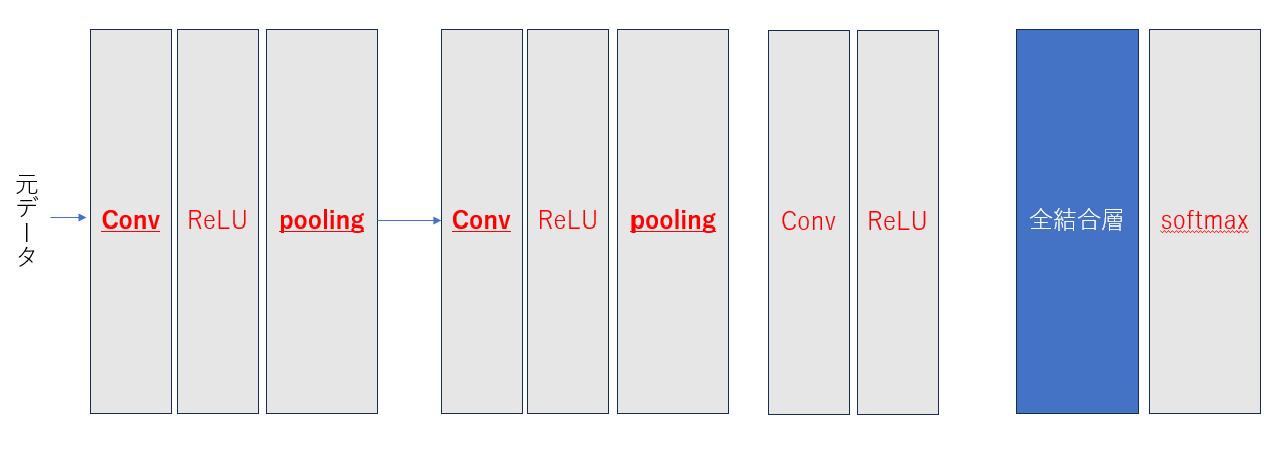
* Convolution - ReLU - (Pooling: 省略されることもある)が新しいフロー。
* 上記に記載していないが、出力に近い層では全結合-ReLUも使われる。

### 畳み込み層
* 全結合層の問題(通常のNNの問題)
    * 3次元情報などの情報を無視して扱うので欠落が多い
* 畳み込み層
    * 形状を維持する。３次元データとして受け取りその形状のまま次の層にデータを出力する。そのため画像に適している。
    * 入力データに対してフィルターを適用する。以下に例を示す。
    * 畳み込み演算は入力データに対してフィルターのウインドウを一定の間隔でスライドさせながら適用させる。それぞれの場所でフィルターの要素と入力の対応する要素を乗算しその和を求める。

* 畳み込み層
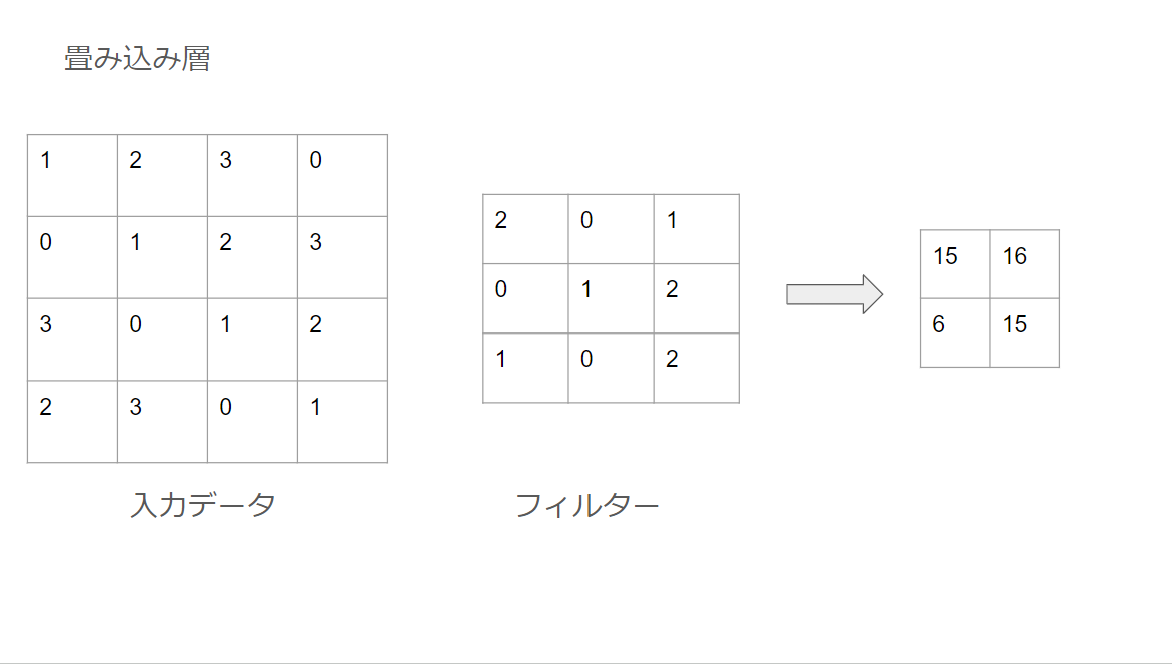


* 以下は具体的な演算結果。

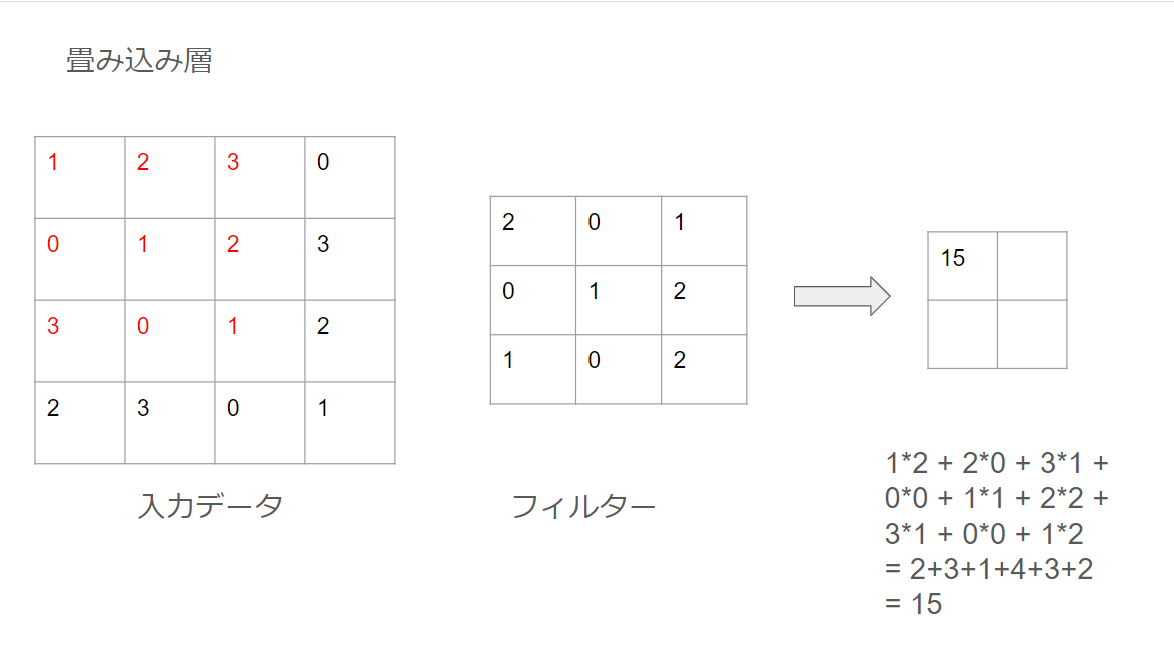

### パディング
* 畳み込み層の処理をおこなう前に入力データの周囲に固定のデータ（たとえば０など）を埋めることがある。これをパディングと呼ぶ。例えば下記では(4, 4)のサイズの入力データに対して幅1のパディングを適用している。これは周囲を幅1ピクセルの0で埋めることをいう。
* パディングを使う理由: 出力サイズの調整。(4, 4)のサイズに(3, 3)のフィルターを適用する場合、出力サイズが(2, 2)になってしまう。畳み込みのたびに空間縮小されるのであれば畳み込み演算回数を少なくせざる得ない。対策としてパディングを利用する。
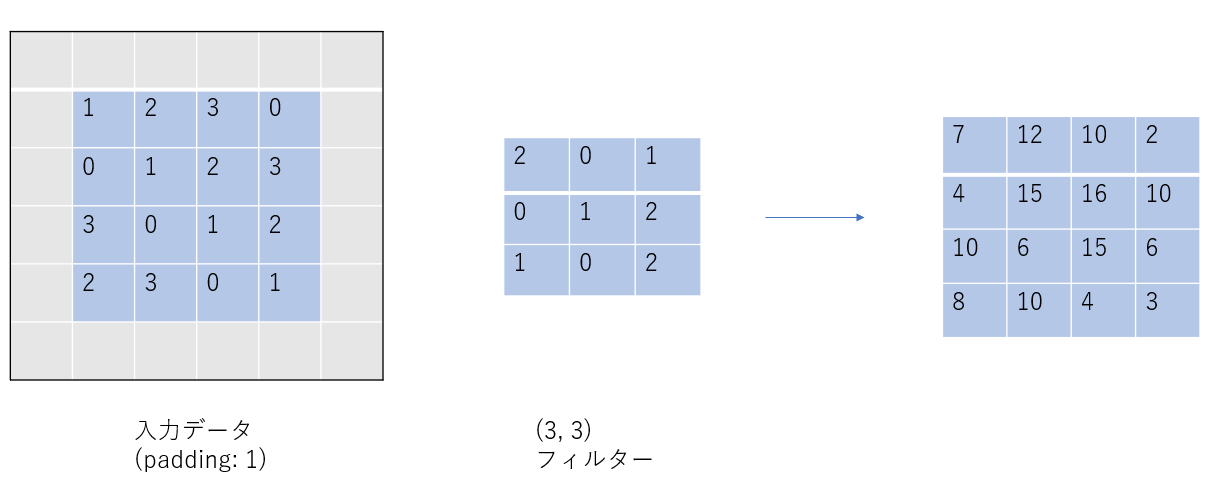

### ストライド
* フィルターを適用する位置の間隔をストライドという。
* これまでの例は全てストライド=1。
* ストライド=2にするとフィルターを適用する窓の間隔が2要素ごとになる。
* ストライドを変更する(値を大きくする)メリット
    * ストライドを大きくすると出力サイズは小さくなる。いっぽう、パディングを大きくすると出力サイズは大きくなる。
    * ダウンサンプリング効果
        * 計算量が膨大な際に、後続の層での計算量を削減できる
    * パラメータ数の削減
        * 出力サイズが小さくなることで、後続の層のパラメータ数が減少する。これはモデルの過学習リスクを低減し、計算効率を向上させる

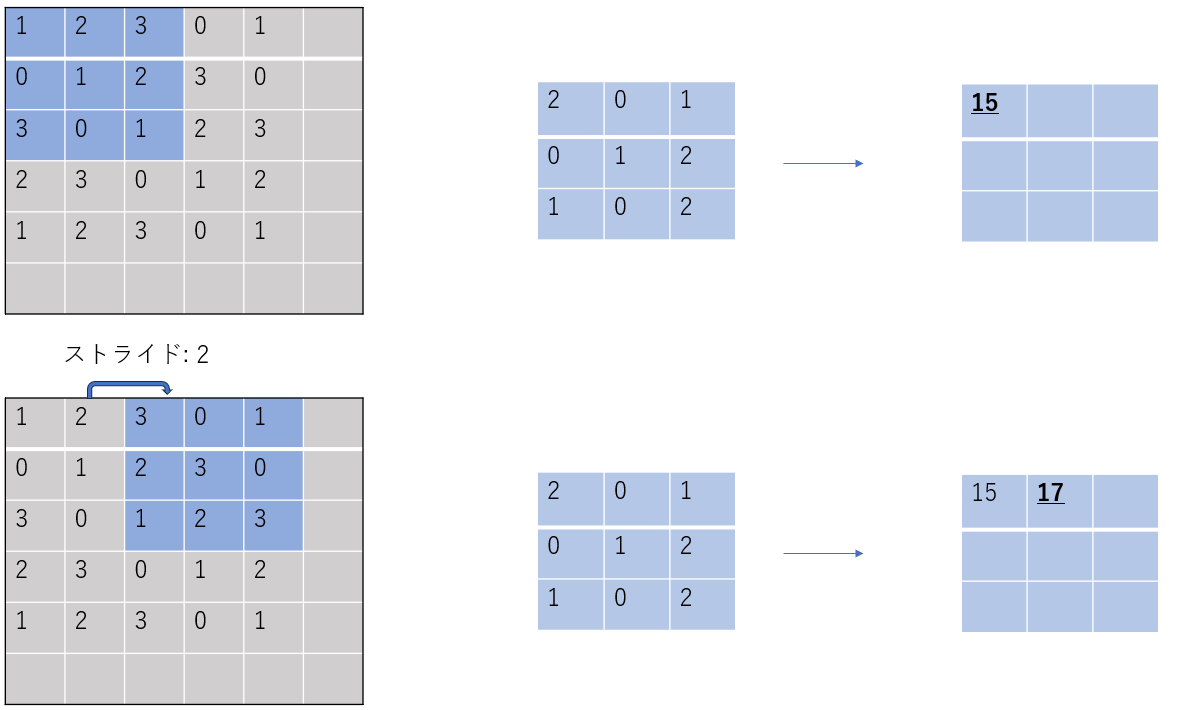

## 3次元での畳み込み演算例
* 手順としては同じ。チャンネルごとに入力データとフィルタの畳み込み演算をおこない、それらの結果を加算する。
* 入力データとフィルタのチャンネル数は同じにする必要がある。ただしフィルタのサイズは好きな値でよい。
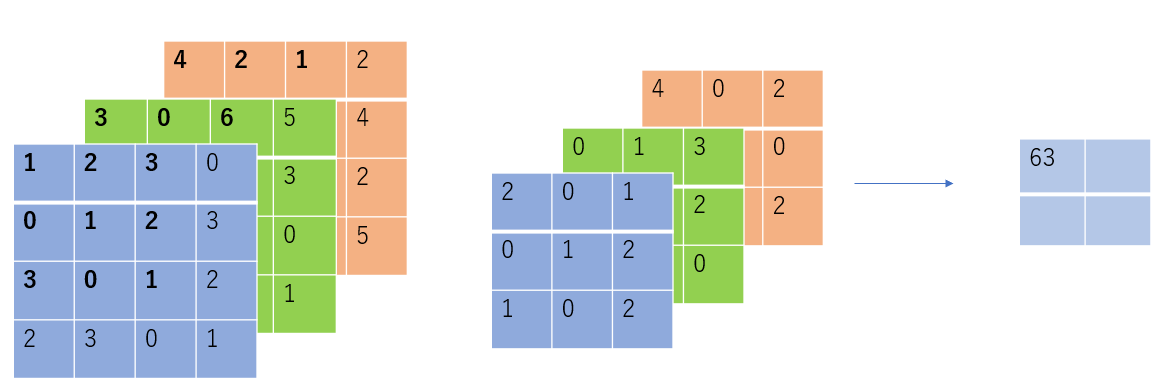

* 3次元で全体像を考えると以下になる
    * フィルターはチャネル数分あるが、上図の計算ロジックを適用するので出力はチャンネル数1となる。
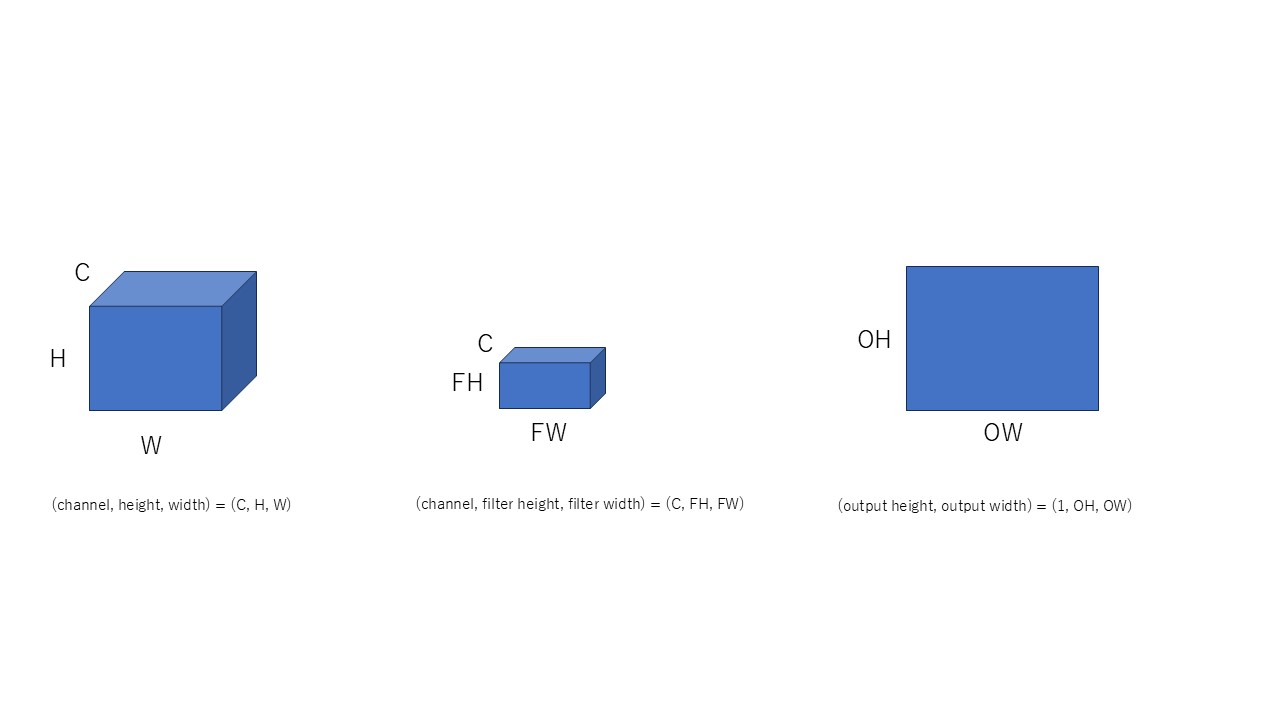

* 出力のチャンネル数を増やすためには以下のようにフィルター数を増やす必要がある。
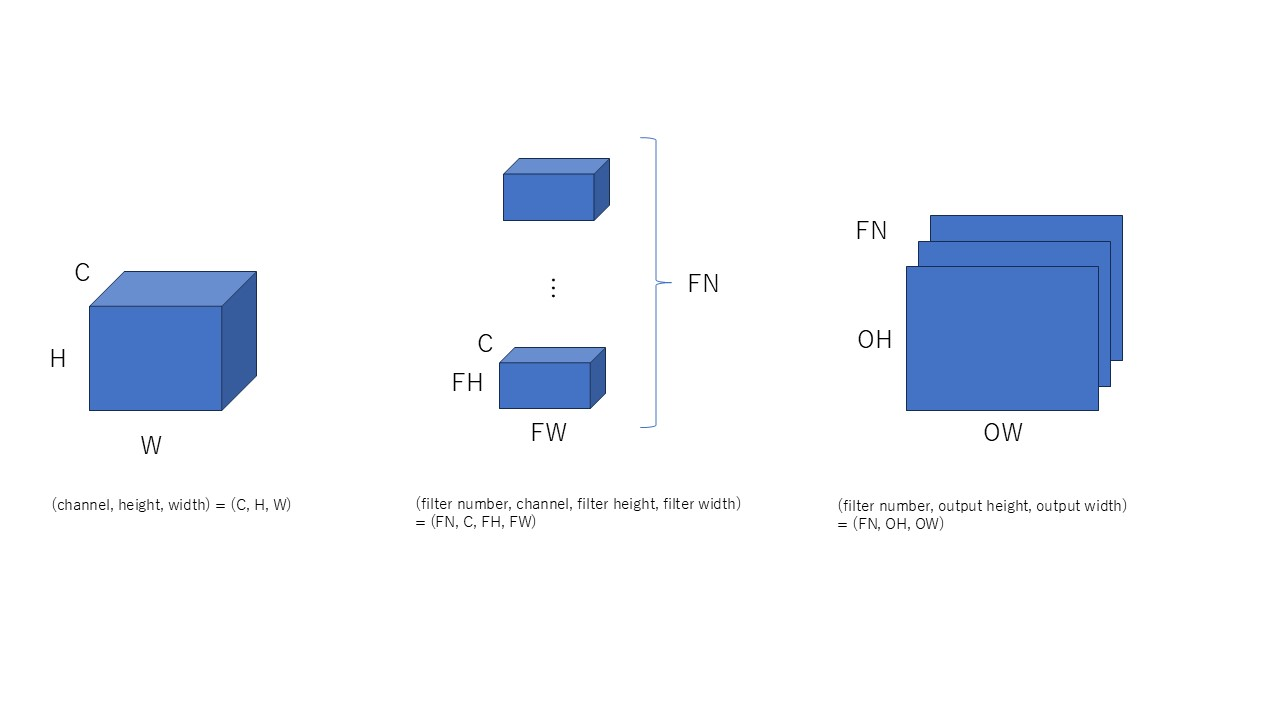

### プーリング層
* 縦・横方向の空間を小さくする演算
* 2*2の領域を1つの要素に集約するような処理をおこない、空間サイズを小さくする
* メリット:
    * ノイズ除去
        * 局所的な領域内で最大値や平均値を取ることで、細かいノイズを軽減する。これにより、モデルの汎化性能が向上する
    * 位置不変性
        * 特徴の厳密な位置よりも、その存在の有無に注目する。これにより、入力画像の小さな移動や変形に対して頑健になる。
    * 回転・スケール不変性の向上
        * 特に最大プーリングの場合、特徴の小さな回転やスケール変化に対する頑健性が向上する
    * ダウンサンプリング
        * 計算効率が向上することでより深いネットワークを構築しやすくなる
    * 特徴
        * 最大値を取るか平均値を取るのみなのでパラメータ不要
        * チャンネル数は変化しない（チャンネルごとに独立して計算される）
        * 入力データのずれをプーリングが吸収することで頑健
* 以下はMaxPoolingの例
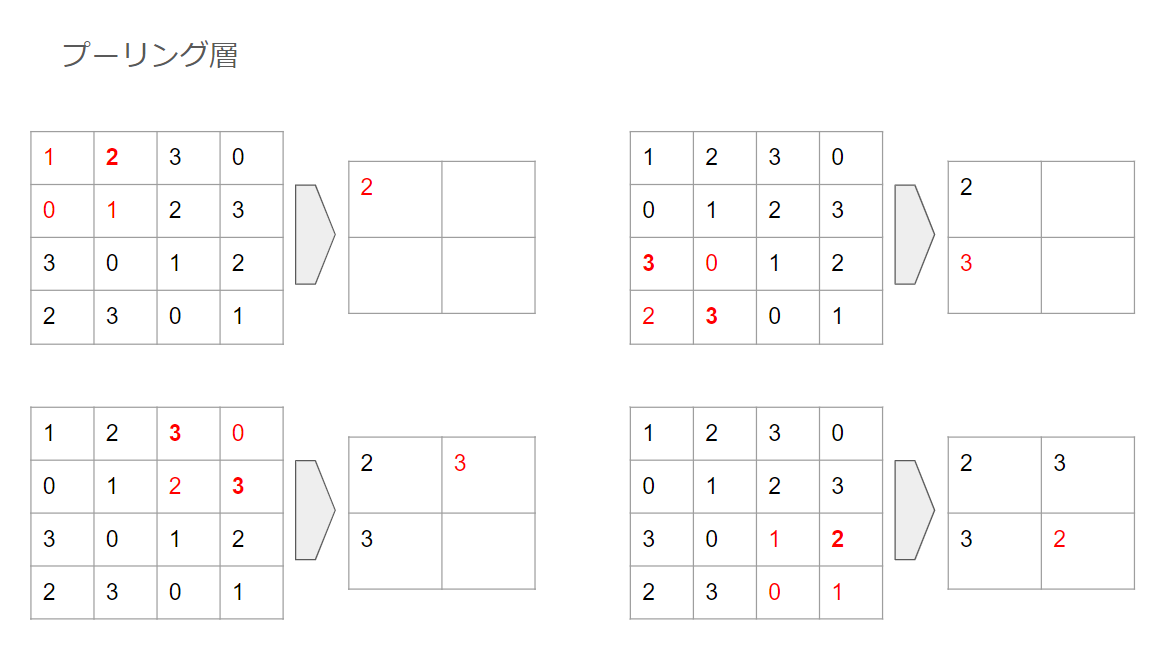